Optimized Parameters: [ 1.1272942  -3.24140214]


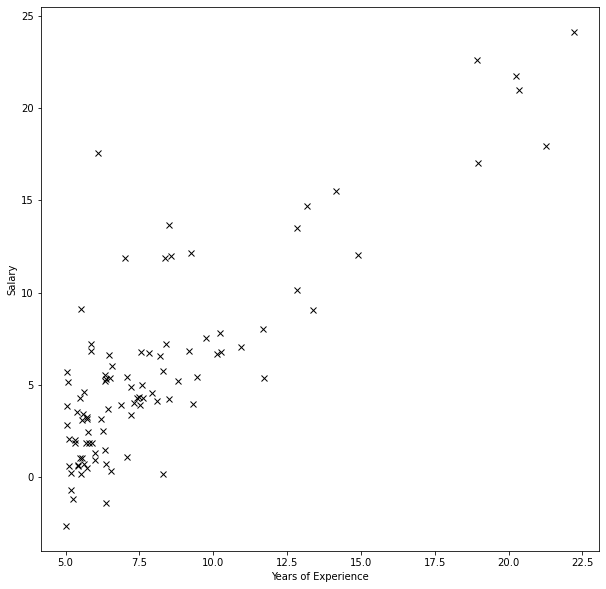

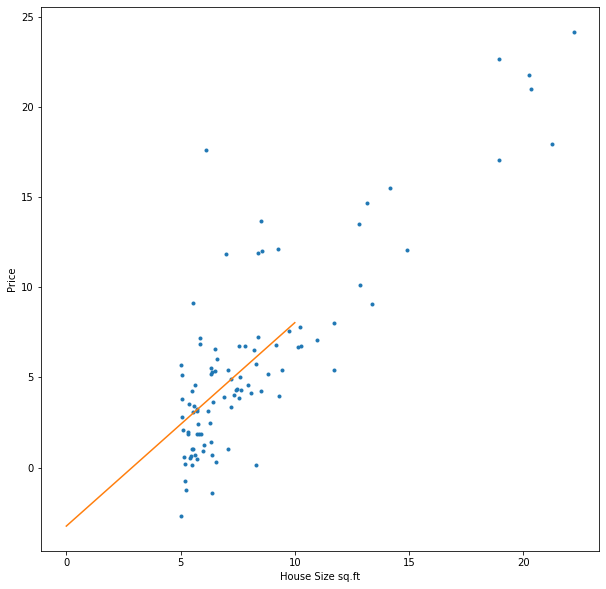

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("dataset/salesdata.txt", names = ['population','price'])
data
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.price)
m = len(y_df)

plt.figure(figsize=(10,10))
plt.plot(X_df, y_df, 'kx')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

iter = 1000
alpha = 0.01

X_df['intercept'] = 1

X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])

def cost_function(X, y, theta):
    m = len(y) 
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    return J

cost_function(X, y, theta)

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = [0] * iterations
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

gd = gradient_descent(X,y,theta,alpha, iter)

t=gd[0]
best_fit_x = np.linspace(0, 10, 20)

best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

print('Optimized Parameters:',t)

plt.figure(figsize=(10,10))
plt.plot(X_df.population, y_df, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.xlabel('Price in 10,000s')
plt.xlabel('House Size sq.ft')
plt.ylabel('Price')
plt.show()
